In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filepath = '/home/keith/Documents/Code/KBSAss1/Data/Traffic Data/TRAFFIC ACCIDENTS DATA.xlsx'
df = pd.read_excel(filepath)
df.head()

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Weather conditions
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,4.30 pm,NaN
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm,NaN
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,NaN,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,6.00 pm,NaN
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN,NaN


In [4]:
df.columns

Index(['Date', 'Accident Spot', 'Area', 'County', 'Road/ Highway',
       'Brief Accident Details/Cause', 'Victims',
       'Total people confirmed dead', 'Time of the Accidents',
       'Weather conditions'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          80 non-null     datetime64[ns]
 1   Accident Spot                 81 non-null     object        
 2   Area                          81 non-null     object        
 3   County                        81 non-null     object        
 4   Road/ Highway                 80 non-null     object        
 5   Brief Accident Details/Cause  79 non-null     object        
 6   Victims                       63 non-null     object        
 7   Total people confirmed dead   72 non-null     object        
 8   Time of the Accidents         25 non-null     object        
 9   Weather conditions            1 non-null      object        
dtypes: datetime64[ns](1), object(9)
memory usage: 6.5+ KB


In [6]:
missing_values = df.isnull().sum()

missing_values

Date                             1
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    1
Brief Accident Details/Cause     2
Victims                         18
Total people confirmed dead      9
Time of the Accidents           56
Weather conditions              80
dtype: int64

#### Dropping weather conditions as is only available in onerow

In [7]:
df = df.drop('Weather conditions', axis=1)
df

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,4.30 pm
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,Drivers/Occupants,4,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,Driver and passengers,3,6.00 pm
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,Pedestrian,1,NaN
...,...,...,...,...,...,...,...,...,...
76,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,Bus lost control and rolled over,Passengers,1,NaN
77,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,Car rammed into a trailer,Passengers,1,11.00 pm
78,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,Truck driver collided with an oncoming matatu,Passengers,1,NaN
79,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,Car rammed into a lorry,Passengers,4,NaN


### Date

In [8]:
df[df['Date'].isnull()]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
66,NaT,Ndarugo,Ndarugo,Kiambu,Thika Road,Truck lost control and overturned,NaN,0,10.00 am


In [9]:
df = df.reset_index(drop=True)

In [10]:
df[df['County'] == 'Kiambu']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
42,2023-07-15,Eka Tano,Kikuyu,Kiambu,Nakuru - Nairobi highway,"Vehicle lost control, hitting other vehocles o...",Passengers,2,NaN
45,2023-09-18,Gitaru,Gitaru,Kiambu,Nakuru - Nairobi highway,Driver lost control and hit barrier,NaN,0,NaN
66,NaT,Ndarugo,Ndarugo,Kiambu,Thika Road,Truck lost control and overturned,NaN,0,10.00 am


In [11]:
df[df['Road/ Highway'] == 'Thika Road ']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
11,2020-09-27,Pangani,Pangani,Nairobi,Thika Road,Driver lost control and rammed into pillar,Passengers and pedestrians,4,12.30 pm
66,NaT,Ndarugo,Ndarugo,Kiambu,Thika Road,Truck lost control and overturned,NaN,0,10.00 am


In [12]:
df.iloc[60:70]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
60,2023-04-18,Naivasha,Naivasha,Nakuru,Nakuru - Nairobi highway,Matatu collided with a lorry,NaN,5,NaN
61,2023-04-01,Amabuko,Kroka Town,Kisii,Kisii Keroka Road,Matatu collided with a trailer,Passengers,5,NaN
62,2023-03-30,Kayole Bridge,Nakuru,Nakuru,Nakuru - Nairobi highway,Bus collided with a matatu,Passengers,18,NaN
63,2023-03-31,Burguret Shopping centre,Burguret,Muranga,Naromoru Nanyuki Road,Bus overturned,Passengers,0,NaN
64,2023-04-18,Maragua,Maragua,Muranga,Kenol Muranga road,Matatu collided with a lorry,Passengers,2,NaN
65,2023-08-08,Migori town,Migori Town,Migori,Migori Isibania Road,Truck failed brakes and ran into ither vehicles,Pedestrians,8,7.30 am
66,NaT,Ndarugo,Ndarugo,Kiambu,Thika Road,Truck lost control and overturned,NaN,0,10.00 am
67,2023-02-04,Kakwamunyen,Kakuma,Turkana,Lodwar Kakuma Road,Driver swerved to avoid on hitting a camel on ...,Passengers,14,10.00 pm
68,2023-01-29,Mamboleo,Mamboleo,Kisumu,Kakamega Kisumu Road,Bus veered off the road and landed in a ditch,Passengers,0,NaN
69,2023-01-26,Kikopey,Kikopey,Nakuru,Nakuru - Nairobi highway,A matatu rammed into a lorry,Passengers,7,NaN


In [13]:
df['Date'] = df['Date'].ffill()

In [14]:
null_values = df.isnull().sum()
null_values

Date                             0
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    1
Brief Accident Details/Cause     2
Victims                         18
Total people confirmed dead      9
Time of the Accidents           56
dtype: int64

### road/highyway

In [15]:
df[df['Road/ Highway'].isnull()]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
72,2022-07-16,Koru,Koru,Kisumu,NaN,Bus rolled as it tried avoiding collision with...,Passengers,0,2.00 pm


In [16]:
df[df['County'] == 'Kisumu']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
22,2022-06-15,Koru,Muhoroni,Kisumu,Kisumu Highway,Bus lost control and rolled,Passengers and driver,NaN,NaN
24,2023-08-29,Ojolla,Ojolla,Kisumu,Kisumu - Busia Road,Head on collision,Passengers and drivers,NaN,NaN
39,2023-08-28,Ojola,Ojola,Kisumu,Kisumu - Busia Road,"Driver tried to overtake, rammed into a traile...",Passenger,1,NaN
68,2023-01-29,Mamboleo,Mamboleo,Kisumu,Kakamega Kisumu Road,Bus veered off the road and landed in a ditch,Passengers,0,NaN
71,2022-08-30,Coptic Round,Coptic,Kisumu,Kisumu Kakamega road,Truck lost control and overturned,Pedestrians,3,NaN
72,2022-07-16,Koru,Koru,Kisumu,NaN,Bus rolled as it tried avoiding collision with...,Passengers,0,2.00 pm


In [17]:
df = df.dropna(subset=['Road/ Highway'])

In [18]:
df.isnull().sum()

Date                             0
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    0
Brief Accident Details/Cause     2
Victims                         18
Total people confirmed dead      9
Time of the Accidents           56
dtype: int64

### Cause

In [19]:
df[df['Brief Accident Details/Cause'].isnull()]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
44,2023-04-02,Masaba,Masaba,Kisii,Kisii Keroka Road,NaN,NaN,-,NaN
59,2023-04-21,Mau Summit,Kuresoi North,Nakuru,Nakuru Eldoret highway,NaN,Pedestrian,1,6.30 pm


check rows where Total people confirmed dead are equal to '-'

In [20]:
df[df['Total people confirmed dead'] == '-']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
44,2023-04-02,Masaba,Masaba,Kisii,Kisii Keroka Road,NaN,NaN,-,NaN


In [21]:
df = df[df['Total people confirmed dead'] != '-']

In [22]:
df[df['Brief Accident Details/Cause'].isnull()]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
59,2023-04-21,Mau Summit,Kuresoi North,Nakuru,Nakuru Eldoret highway,NaN,Pedestrian,1,6.30 pm


In [23]:
df[df['County'] == 'Nakuru']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,Passengers,4,4.30 pm
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,Passengers,1,5.50 pm
18,2023-06-30,Londiani,Londiani Junction,Nakuru,Nakuru Kericho Highway,Lorry failed brakes and rammed into four matat...,"Drivers,Passengers and pedestrians",52,6.30 pm
20,2021-09-01,Jubat,Londiani,Nakuru,Nakuru Kericho Highway,Matatu and truck head on collision,Passengers and driver,3,9.00 pm
23,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,NaN,NaN,NaN
25,2021-08-25,Greensteads,Greensteads,Nakuru,Nakuru - Nairobi highway,Head on collision,Passengers,NaN,NaN
26,2023-07-09,Ngata Bridge,Ngata,Nakuru,Nakuru Eldoret Highway,Matatu and truck head on collision,Passenger,1,10.00 pm
34,2023-03-30,Naivasha,Kayole Naivasha,Nakuru,Nakuru - Nairobi highway,Bus collided with matatu,Passengers and drivers,14,1.00 pm
35,2023-06-24,Migaa,Mau Hills,Nakuru,Nakuru Eldoret Highway,Matatu driver lot ontrol and hit a lorry,Driver and passengers,3,NaN
36,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,NaN,NaN,NaN


In [24]:
df[df['Road/ Highway'] == 'Nakuru Eldoret highway']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
57,2023-06-24,Migaa,Mau Hills,Nakuru,Nakuru Eldoret highway,Matatu driver lost control and hit a lorry,passenger,3,NaN
58,2023-05-15,Sachangwan,Sachangwan,Nakuru,Nakuru Eldoret highway,Matatu hit a bump and veered off the road,Passengers,5,2.00 am
59,2023-04-21,Mau Summit,Kuresoi North,Nakuru,Nakuru Eldoret highway,NaN,Pedestrian,1,6.30 pm


In [25]:
df['Brief Accident Details/Cause'] = df['Brief Accident Details/Cause'].bfill()

In [26]:
df.isnull().sum()

Date                             0
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    0
Brief Accident Details/Cause     0
Victims                         17
Total people confirmed dead      9
Time of the Accidents           55
dtype: int64

### victims

In [27]:
unique_victims_arr = df['Victims'].unique()
unique_victims_arr

array(['Passengers', 'Drivers/Occupants', 'Driver and passengers',
       'Pedestrian', 'Passengers and pedestrians ', nan,
       'Occupants of the small vehicle ',
       'Drivers,Passengers and pedestrians', 'Passengers and driver',
       'Rider', 'Passengers and drivers', 'Passenger',
       'Passangers and driver', 'Driver and other motorists ', 'Motorist',
       'Pedestrians', 'passengers', 'passenger'], dtype=object)

In [28]:
df['Victims'] = df['Victims'].str.lower().str.strip()
df['Victims'].unique()

array(['passengers', 'drivers/occupants', 'driver and passengers',
       'pedestrian', 'passengers and pedestrians', nan,
       'occupants of the small vehicle',
       'drivers,passengers and pedestrians', 'passengers and driver',
       'rider', 'passengers and drivers', 'passenger',
       'passangers and driver', 'driver and other motorists', 'motorist',
       'pedestrians'], dtype=object)

In [29]:
df[df['Victims'] == 'passengers']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4,4.30 pm
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1,5.50 pm
5,2022-08-06,Mlima Swara,Mlima Swara,Murang'a,Kenol-Sagana Road,Car hit a stationary lorry,passengers,5,NaN
6,2022-07-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Driver lost control and swerved off the bridge,passengers,6,NaN
7,2022-07-28,Makuyu,Makuyu,Murang'a,Kenol-Sagana Road,Vehicle rammed into a lorry,passengers,7,NaN
8,2022-06-28,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,passengers,4,NaN
9,2021-09-21,River Tungu,River Tungu,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,passengers,5,NaN
10,2021-09-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,passengers,4,NaN
15,2023-09-08,Mlima Kiu,Salama,Makueni,Mombasa - Nairobi highway,Matatu collided head on with an oncoming truck,passengers,4,NaN
16,2023-04-18,Naivasha,Delamere Farm,Naivasha,Nairobi - Nakuru highway,Head on collision Matatu and lorry,passengers,6,NaN


In [30]:
df[df['Victims'] == 'passenger']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
26,2023-07-09,Ngata Bridge,Ngata,Nakuru,Nakuru Eldoret Highway,Matatu and truck head on collision,passenger,1,10.00 pm
39,2023-08-28,Ojola,Ojola,Kisumu,Kisumu - Busia Road,"Driver tried to overtake, rammed into a traile...",passenger,1,NaN
57,2023-06-24,Migaa,Mau Hills,Nakuru,Nakuru Eldoret highway,Matatu driver lost control and hit a lorry,passenger,3,NaN


In [31]:
#replace passenger with passengers
df['Victims'] = df['Victims'].replace('passenger', 'passengers')
df[df['Victims'] == 'passenger']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents


In [32]:
df[df['Victims'] == 'pedestrians']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
41,2023-05-10,Migori Town,Migori Town,Migori,Migori-Kisii-Isebania Highway,"Lorry had faulty brakes, lost control and ramm...",pedestrians,2,NaN
65,2023-08-08,Migori town,Migori Town,Migori,Migori Isibania Road,Truck failed brakes and ran into ither vehicles,pedestrians,8,7.30 am
71,2022-08-30,Coptic Round,Coptic,Kisumu,Kisumu Kakamega road,Truck lost control and overturned,pedestrians,3,NaN


In [33]:
df[df['Victims'] == 'pedestrian']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1,NaN
59,2023-04-21,Mau Summit,Kuresoi North,Nakuru,Nakuru Eldoret highway,Matatu collided with a lorry,pedestrian,1,6.30 pm


In [34]:
df['Victims'].unique()

array(['passengers', 'drivers/occupants', 'driver and passengers',
       'pedestrian', 'passengers and pedestrians', nan,
       'occupants of the small vehicle',
       'drivers,passengers and pedestrians', 'passengers and driver',
       'rider', 'passengers and drivers', 'passangers and driver',
       'driver and other motorists', 'motorist', 'pedestrians'],
      dtype=object)

In [35]:
df['Victims'] = df['Victims'].replace(['driver and passengers', 'passengers and driver', 'passangers and driver'], 'driver and passengers')
df['Victims'].unique()

array(['passengers', 'drivers/occupants', 'driver and passengers',
       'pedestrian', 'passengers and pedestrians', nan,
       'occupants of the small vehicle',
       'drivers,passengers and pedestrians', 'rider',
       'passengers and drivers', 'driver and other motorists', 'motorist',
       'pedestrians'], dtype=object)

In [36]:
df[df['Victims'] == 'rider']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
21,2023-09-27,Sotik,Sotik,Bomet,Bomet - Sotik highway,Bodaboda rider hit by matatu,rider,NaN,NaN


In [37]:
df[df['Victims'] == 'motorist']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
40,2023-08-28,Zion Area,Zion,Makueni,Mombasa - Nairobi highway,Bus hit a motorbike,motorist,1,NaN


In [38]:
df['Victims'] = df['Victims'].replace('motorist', 'rider')
df[df['Victims'] == 'rider']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
21,2023-09-27,Sotik,Sotik,Bomet,Bomet - Sotik highway,Bodaboda rider hit by matatu,rider,NaN,NaN
40,2023-08-28,Zion Area,Zion,Makueni,Mombasa - Nairobi highway,Bus hit a motorbike,rider,1,NaN


In [39]:
df['Victims'].unique()

array(['passengers', 'drivers/occupants', 'driver and passengers',
       'pedestrian', 'passengers and pedestrians', nan,
       'occupants of the small vehicle',
       'drivers,passengers and pedestrians', 'rider',
       'passengers and drivers', 'driver and other motorists',
       'pedestrians'], dtype=object)

In [40]:
df[df['Victims'] == 'drivers/occupants']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers/occupants,4,NaN


In [41]:
df[df['Victims'] == 'passengers and drivers']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
24,2023-08-29,Ojolla,Ojolla,Kisumu,Kisumu - Busia Road,Head on collision,passengers and drivers,NaN,NaN
34,2023-03-30,Naivasha,Kayole Naivasha,Nakuru,Nakuru - Nairobi highway,Bus collided with matatu,passengers and drivers,14,1.00 pm


In [42]:
df[df['Victims'] == 'occupants of the small vehicle']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
13,2023-08-20,Naivasha,Marula Farm,Naivasha,Nairobi - Nakuru highway,Personal vehicle rammed onto an oncoming bus,occupants of the small vehicle,2,2.00 am
47,2023-08-20,Naivasha,Marula Farm,Naivasha,Nairobi - Nakuru highway,Personal vehicle rammed onto an oncoming bus,occupants of the small vehicle,3,2.00 am


In [43]:
df['Victims'] = df['Victims'].replace(['drivers/occupants', 'passengers and drivers', 'occupants of the small vehicle'], 'drivers and passengers')
df['Victims'].unique()

array(['passengers', 'drivers and passengers', 'driver and passengers',
       'pedestrian', 'passengers and pedestrians', nan,
       'drivers,passengers and pedestrians', 'rider',
       'driver and other motorists', 'pedestrians'], dtype=object)

In [44]:
df[df['Victims'] == 'passengers and pedestrians']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
11,2020-09-27,Pangani,Pangani,Nairobi,Thika Road,Driver lost control and rammed into pillar,passengers and pedestrians,4,12.30 pm


In [45]:
df[df['Victims'] == 'drivers,passengers and pedestrians']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
18,2023-06-30,Londiani,Londiani Junction,Nakuru,Nakuru Kericho Highway,Lorry failed brakes and rammed into four matat...,"drivers,passengers and pedestrians",52,6.30 pm


In [46]:
df[df['Victims'] == 'driver and other motorists']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
31,2022-07-05,Mlolongo,Mlolongo Exit,Nairobi,Nairobi Express way,Motorist crashed into toll station,driver and other motorists,1,NaN


In [47]:
len(df['Victims'].unique())

10

In [48]:
df.isnull().sum()

Date                             0
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    0
Brief Accident Details/Cause     0
Victims                         17
Total people confirmed dead      9
Time of the Accidents           55
dtype: int64

In [49]:
df[df['Victims'].isnull()]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
12,2021-02-23,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Head on Collision,NaN,NaN,2.00 am
14,2020-08-17,River Maara,River Maara,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,NaN,NaN,NaN
23,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,NaN,NaN,NaN
28,2023-05-22,Isinya,Isinya,Kajiado,Isinya Kiserian Road,Bus lost control and rolled into a ditch,NaN,7,NaN
30,2023-05-15,Sachangwan,Sachangwan,Bomet,Nakuru Eldoret Highway,"Matatu hit a bump, veered off the road and lan...",NaN,5,2.00 am
36,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,NaN,NaN,NaN
37,2023-09-27,Laisamis,Laisamis,Isiolo,Marsabit Isiolo Highway,Vehicle veered off rhe road after tyre burst,NaN,2,NaN
38,2023-09-26,Ainabkoi Intersection,Ainabkoi,Uansin Gishi,Nakuru Eldoret Highway,Bus collided with a saloon car,NaN,0,NaN
43,2023-04-16,Josa,Mwatate,Taita Taveta,Mombasa - Nairobi highway,Head on Collision,NaN,10,NaN
45,2023-09-18,Gitaru,Gitaru,Kiambu,Nakuru - Nairobi highway,Driver lost control and hit barrier,NaN,0,NaN


In [50]:
# Display rows with missing Victims data
df_missing_victims = df[df['Victims'].isnull()]
df_missing_victims[['Brief Accident Details/Cause', 'Total people confirmed dead']]

,Brief Accident Details/Cause,Total people confirmed dead
12,Head on Collision,NaN
14,Vehicle rolled into the river,NaN
23,Vehicle lost control nd rolled,NaN
28,Bus lost control and rolled into a ditch,7
30,"Matatu hit a bump, veered off the road and lan...",5
36,Vehicle lost control nd rolled,NaN
37,Vehicle veered off rhe road after tyre burst,2
38,Bus collided with a saloon car,0
43,Head on Collision,10
45,Driver lost control and hit barrier,0


In [51]:
#check Brief Accident Details/Cause for keywords like collision etc
df[df['Brief Accident Details/Cause'].str.contains('collision|collided|collide', case=False, na=False)]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4,4.30 pm
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1,5.50 pm
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3,6.00 pm
12,2021-02-23,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Head on Collision,NaN,NaN,2.00 am
15,2023-09-08,Mlima Kiu,Salama,Makueni,Mombasa - Nairobi highway,Matatu collided head on with an oncoming truck,passengers,4,NaN
16,2023-04-18,Naivasha,Delamere Farm,Naivasha,Nairobi - Nakuru highway,Head on collision Matatu and lorry,passengers,6,NaN
17,2023-09-07,Voi,Ndii,Makueni,Mombasa - Nairobi highway,Matatu and Lorry head on collision,passengers,12,4.20 pm
19,2022-09-21,Sachangwan,Sachangwan,Bomet,Bomet - Sotik highway,Matatu collided with a tractor,driver and passengers,4,NaN
20,2021-09-01,Jubat,Londiani,Nakuru,Nakuru Kericho Highway,Matatu and truck head on collision,driver and passengers,3,9.00 pm


/tmp/ipykernel_14501/289466738.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Victims', y='Total people confirmed dead', data=df_victims_dead, palette='Blues_d')


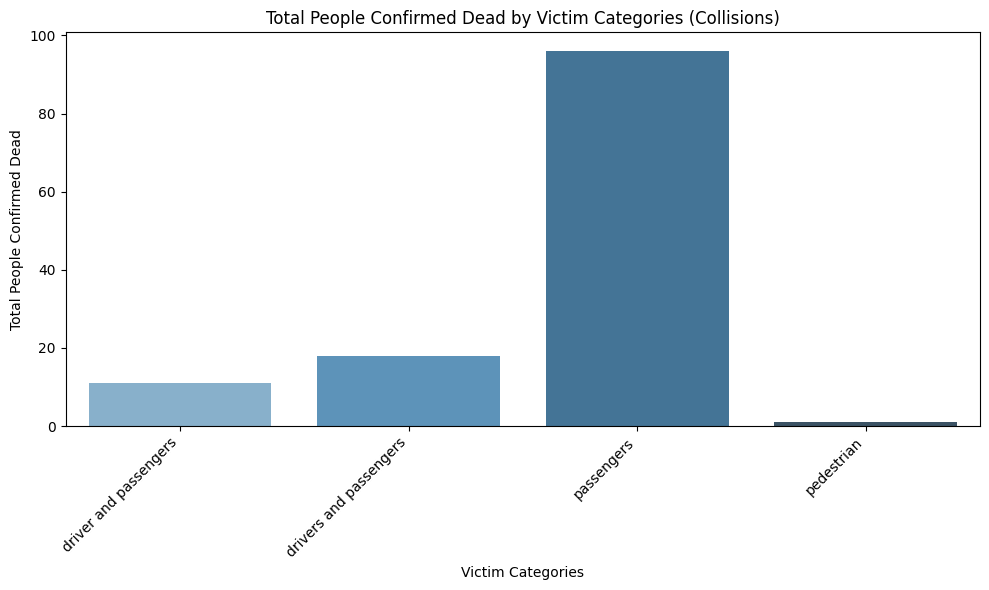

In [52]:
# Filter rows where accident details contain 'collision'
df_collision = df[df['Brief Accident Details/Cause'].str.contains('collision|collided|collide', case=False, na=False)]

# Group by Victims and sum Total people confirmed dead
df_victims_dead = df_collision.groupby('Victims')['Total people confirmed dead'].sum().reset_index()

# Plot the data using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Victims', y='Total people confirmed dead', data=df_victims_dead, palette='Blues_d')

# Add labels and title
plt.xlabel('Victim Categories')
plt.ylabel('Total People Confirmed Dead')
plt.title('Total People Confirmed Dead by Victim Categories (Collisions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()


In [53]:
coll_df = df[df['Brief Accident Details/Cause'].str.contains('collision|collided|collide', case=False, na=False)]
mode_coll = coll_df['Victims'].mode()[0]
print(f'The most common victim category in collisions is: {mode_coll}')

The most common victim category in collisions is: passengers


In [54]:
# condition = (coll_df) & (df['Victims'].isnull())
coll_cond = df['Brief Accident Details/Cause'].str.contains('collision|collided|collide', case=False, na=False)
df.loc[(coll_cond) & (df['Victims'].isnull()), 'Victims'] = mode_coll
df.isnull().sum()

Date                             0
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    0
Brief Accident Details/Cause     0
Victims                         12
Total people confirmed dead      9
Time of the Accidents           55
dtype: int64

In [55]:
df[df['Victims'].isnull()]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
14,2020-08-17,River Maara,River Maara,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,NaN,NaN,NaN
23,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,NaN,NaN,NaN
28,2023-05-22,Isinya,Isinya,Kajiado,Isinya Kiserian Road,Bus lost control and rolled into a ditch,NaN,7,NaN
30,2023-05-15,Sachangwan,Sachangwan,Bomet,Nakuru Eldoret Highway,"Matatu hit a bump, veered off the road and lan...",NaN,5,2.00 am
36,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,NaN,NaN,NaN
37,2023-09-27,Laisamis,Laisamis,Isiolo,Marsabit Isiolo Highway,Vehicle veered off rhe road after tyre burst,NaN,2,NaN
45,2023-09-18,Gitaru,Gitaru,Kiambu,Nakuru - Nairobi highway,Driver lost control and hit barrier,NaN,0,NaN
46,2023-09-08,Malili,Malili,Makueni,Mombasa - Nairobi highway,"Involved a truck, lorry and saloon car",NaN,0,4.20 pm
48,2023-08-30,Nairagie-Enkare,Narok,Narok,Narok Mai Mahiu road,Bus burst into flames,NaN,0,NaN
52,2023-07-04,Mau Summit,Kuresoi North,Nakuru,Nakuru Kericho Highway,Bus lost control and landed in a ditch,NaN,0,NaN


In [56]:
df[df['Brief Accident Details/Cause'].str.contains('lost|control|roll', case=False, na=False)]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
6,2022-07-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Driver lost control and swerved off the bridge,passengers,6,NaN
8,2022-06-28,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,passengers,4,NaN
9,2021-09-21,River Tungu,River Tungu,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,passengers,5,NaN
10,2021-09-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,passengers,4,NaN
11,2020-09-27,Pangani,Pangani,Nairobi,Thika Road,Driver lost control and rammed into pillar,passengers and pedestrians,4,12.30 pm
14,2020-08-17,River Maara,River Maara,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,NaN,NaN,NaN
22,2022-06-15,Koru,Muhoroni,Kisumu,Kisumu Highway,Bus lost control and rolled,driver and passengers,NaN,NaN
23,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,NaN,NaN,NaN
27,2023-01-13,Ratili,Ratili Narok south,Narok,Narok road,Saloom car rolled,driver and passengers,NaN,NaN
28,2023-05-22,Isinya,Isinya,Kajiado,Isinya Kiserian Road,Bus lost control and rolled into a ditch,NaN,7,NaN


/tmp/ipykernel_14501/1147764831.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Victims', y='Total people confirmed dead', data=df_victims_dead, palette='Blues_d')


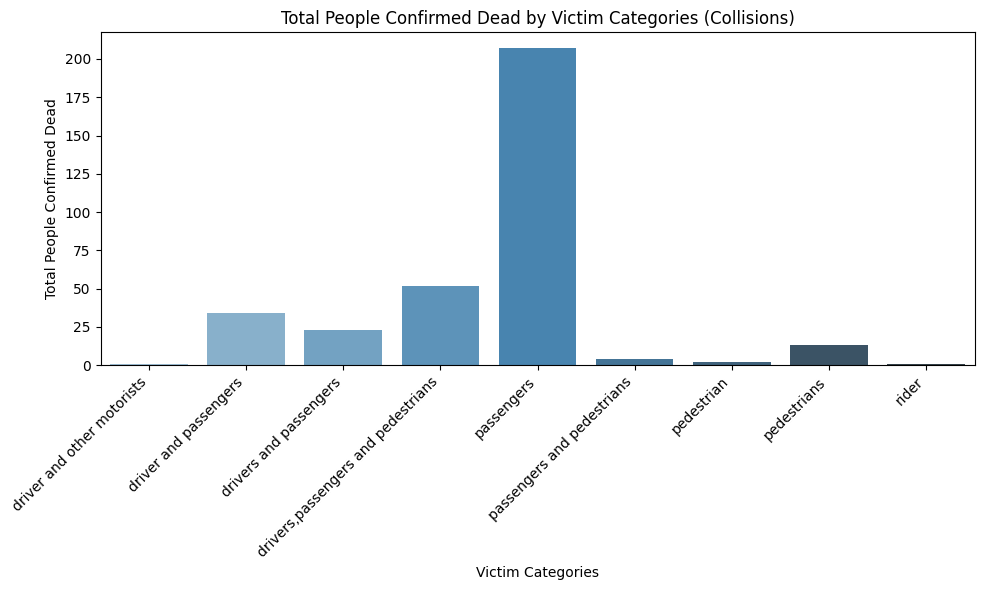

In [57]:
# Group by Victims and sum Total people confirmed dead
df_victims_dead = df.groupby('Victims')['Total people confirmed dead'].sum().reset_index()

# Plot the data using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Victims', y='Total people confirmed dead', data=df_victims_dead, palette='Blues_d')

# Add labels and title
plt.xlabel('Victim Categories')
plt.ylabel('Total People Confirmed Dead')
plt.title('Total People Confirmed Dead by Victim Categories (Collisions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

In [58]:
#fill null victims with the mode
mode_victims = df['Victims'].mode()[0]
df['Victims'] = df['Victims'].fillna(mode_victims)
df.isnull().sum()

Date                             0
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    0
Brief Accident Details/Cause     0
Victims                          0
Total people confirmed dead      9
Time of the Accidents           55
dtype: int64

#### Dead people null values

In [59]:
df[df['Total people confirmed dead'].isnull()]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
12,2021-02-23,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Head on Collision,passengers,NaN,2.00 am
14,2020-08-17,River Maara,River Maara,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,passengers,NaN,NaN
21,2023-09-27,Sotik,Sotik,Bomet,Bomet - Sotik highway,Bodaboda rider hit by matatu,rider,NaN,NaN
22,2022-06-15,Koru,Muhoroni,Kisumu,Kisumu Highway,Bus lost control and rolled,driver and passengers,NaN,NaN
23,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,passengers,NaN,NaN
24,2023-08-29,Ojolla,Ojolla,Kisumu,Kisumu - Busia Road,Head on collision,drivers and passengers,NaN,NaN
25,2021-08-25,Greensteads,Greensteads,Nakuru,Nakuru - Nairobi highway,Head on collision,passengers,NaN,NaN
27,2023-01-13,Ratili,Ratili Narok south,Narok,Narok road,Saloom car rolled,driver and passengers,NaN,NaN
36,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,passengers,NaN,NaN


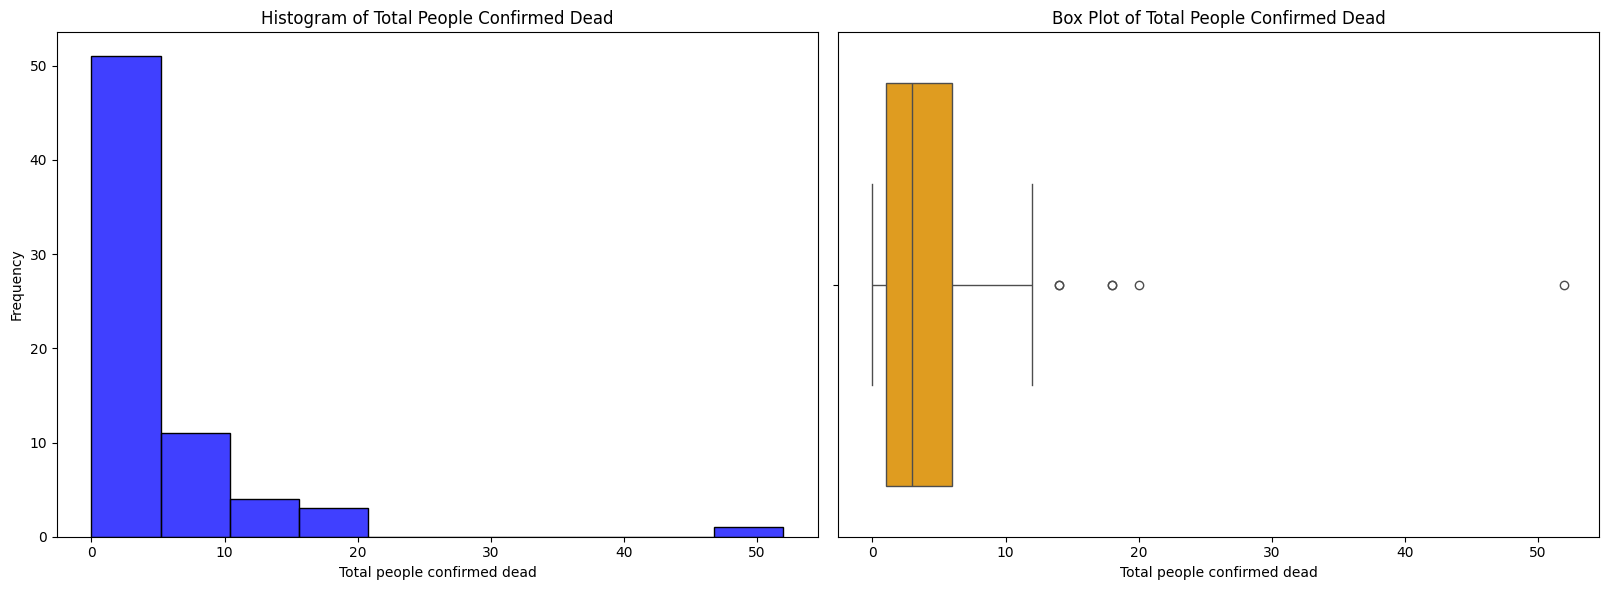

In [60]:
# Drop NaN values for visualization purposes
tot_dead_ppl = df['Total people confirmed dead'].dropna()

# Create subplots for Histogram, Box Plot, and KDE Plot
plt.figure(figsize=(24, 6))

# 1. Histogram
plt.subplot(1, 3, 1)
sns.histplot(tot_dead_ppl, bins=10, kde=False, color='blue')
plt.title('Histogram of Total People Confirmed Dead')
plt.xlabel('Total people confirmed dead')
plt.ylabel('Frequency')

# 2. Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x=tot_dead_ppl, color='orange')
plt.title('Box Plot of Total People Confirmed Dead')
plt.xlabel('Total people confirmed dead')

plt.tight_layout()
plt.show()


In [61]:
# Calculate the median of the 'Total people confirmed dead' column
median_value = df['Total people confirmed dead'].median()

print(f"Median of Total people confirmed dead: {median_value}")

Median of Total people confirmed dead: 3.0


In [62]:
df[df['Total people confirmed dead'].isnull()]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
12,2021-02-23,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Head on Collision,passengers,NaN,2.00 am
14,2020-08-17,River Maara,River Maara,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,passengers,NaN,NaN
21,2023-09-27,Sotik,Sotik,Bomet,Bomet - Sotik highway,Bodaboda rider hit by matatu,rider,NaN,NaN
22,2022-06-15,Koru,Muhoroni,Kisumu,Kisumu Highway,Bus lost control and rolled,driver and passengers,NaN,NaN
23,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,passengers,NaN,NaN
24,2023-08-29,Ojolla,Ojolla,Kisumu,Kisumu - Busia Road,Head on collision,drivers and passengers,NaN,NaN
25,2021-08-25,Greensteads,Greensteads,Nakuru,Nakuru - Nairobi highway,Head on collision,passengers,NaN,NaN
27,2023-01-13,Ratili,Ratili Narok south,Narok,Narok road,Saloom car rolled,driver and passengers,NaN,NaN
36,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,passengers,NaN,NaN


In [63]:
df[df['Road/ Highway'] == 'Nakuru Kericho Highway']

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
18,2023-06-30,Londiani,Londiani Junction,Nakuru,Nakuru Kericho Highway,Lorry failed brakes and rammed into four matat...,"drivers,passengers and pedestrians",52,6.30 pm
20,2021-09-01,Jubat,Londiani,Nakuru,Nakuru Kericho Highway,Matatu and truck head on collision,driver and passengers,3,9.00 pm
23,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,passengers,NaN,NaN
36,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,passengers,NaN,NaN
52,2023-07-04,Mau Summit,Kuresoi North,Nakuru,Nakuru Kericho Highway,Bus lost control and landed in a ditch,passengers,0,NaN


In [64]:
duplicate_rows = df[df.duplicated()]

duplicate_rows

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
36,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,passengers,NaN,NaN


In [65]:
df = df.drop_duplicates()
df

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4,4.30 pm
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1,5.50 pm
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3,6.00 pm
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1,NaN
...,...,...,...,...,...,...,...,...,...
76,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,Bus lost control and rolled over,passengers,1,NaN
77,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,Car rammed into a trailer,passengers,1,11.00 pm
78,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,Truck driver collided with an oncoming matatu,passengers,1,NaN
79,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,Car rammed into a lorry,passengers,4,NaN


In [66]:
df[df.duplicated()]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents


In [67]:
df[df['Total people confirmed dead'].isnull()]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
12,2021-02-23,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Head on Collision,passengers,NaN,2.00 am
14,2020-08-17,River Maara,River Maara,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,passengers,NaN,NaN
21,2023-09-27,Sotik,Sotik,Bomet,Bomet - Sotik highway,Bodaboda rider hit by matatu,rider,NaN,NaN
22,2022-06-15,Koru,Muhoroni,Kisumu,Kisumu Highway,Bus lost control and rolled,driver and passengers,NaN,NaN
23,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,passengers,NaN,NaN
24,2023-08-29,Ojolla,Ojolla,Kisumu,Kisumu - Busia Road,Head on collision,drivers and passengers,NaN,NaN
25,2021-08-25,Greensteads,Greensteads,Nakuru,Nakuru - Nairobi highway,Head on collision,passengers,NaN,NaN
27,2023-01-13,Ratili,Ratili Narok south,Narok,Narok road,Saloom car rolled,driver and passengers,NaN,NaN


In [68]:
df['Total people confirmed dead'] = df['Total people confirmed dead'].fillna(median_value)
df.isnull().sum()

/tmp/ipykernel_14501/2807763485.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total people confirmed dead'] = df['Total people confirmed dead'].fillna(median_value)


Date                             0
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    0
Brief Accident Details/Cause     0
Victims                          0
Total people confirmed dead      0
Time of the Accidents           54
dtype: int64

### Time of accident

In [69]:
df['Time of the Accidents'].unique()

array(['4.30 pm', '5.50 pm', nan, '6.00 pm', '12.30 pm', '2.00 am',
       '4.20 pm', '6.30 pm', '9.00 pm', '10.00 pm', '11.30 pm', '1.00 pm',
       '7.30 pm', '7.30 am', '10.00 am', '11.00 pm', '4.30 am'],
      dtype=object)

In [70]:
#function to get time category
def time_categorizer(time_str):
    if pd.isnull(time_str):
        return
    try:
        time = pd.to_datetime(time_str, format='%I.%M %p').time()
        if time < pd.to_datetime('04:00 AM').time() or time >= pd.to_datetime('09:00 PM').time():
            return 'Night'
        elif time < pd.to_datetime('12:00 PM').time():
            return 'Morning'
        elif time < pd.to_datetime('05:00 PM').time():
            return 'Afternoon'
        else:
            return 'Evening'
    except:
        return

df['Time Category'] = df['Time of the Accidents'].apply(time_categorizer)

df[['Time of the Accidents', 'Time Category']].head()


,Time of the Accidents,Time Category
0,4.30 pm,Afternoon
1,5.50 pm,Evening
2,NaN,None
3,6.00 pm,Evening
4,NaN,None


/tmp/ipykernel_14501/3091338702.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_time_of_accidents.index, y=df_time_of_accidents.values, palette='Blues_d')


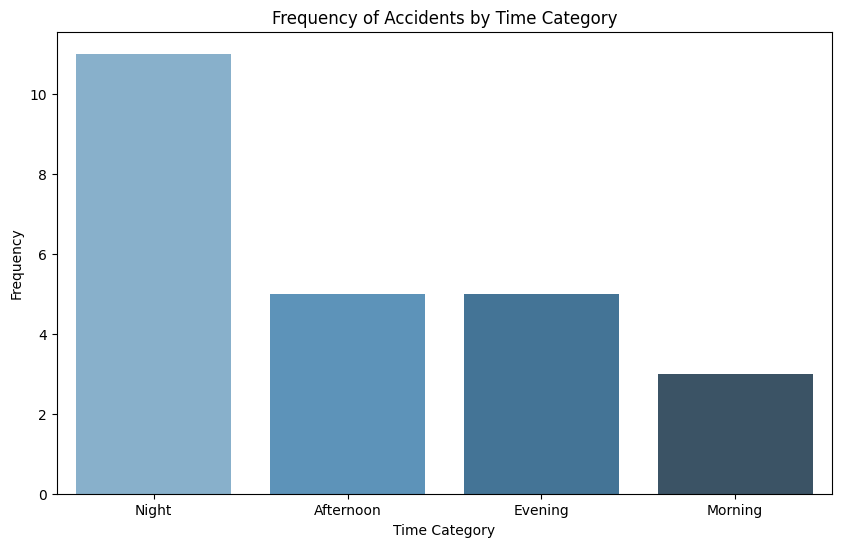

In [71]:
df_time_of_accidents = df['Time Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=df_time_of_accidents.index, y=df_time_of_accidents.values, palette='Blues_d')
plt.xlabel('Time Category')
plt.ylabel('Frequency')
plt.title('Frequency of Accidents by Time Category')
plt.show()

In [72]:
df[df['Time Category'].isnull()]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Time Category
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4.0,NaN,None
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1.0,NaN,None
5,2022-08-06,Mlima Swara,Mlima Swara,Murang'a,Kenol-Sagana Road,Car hit a stationary lorry,passengers,5.0,NaN,None
6,2022-07-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Driver lost control and swerved off the bridge,passengers,6.0,NaN,None
7,2022-07-28,Makuyu,Makuyu,Murang'a,Kenol-Sagana Road,Vehicle rammed into a lorry,passengers,7.0,NaN,None
8,2022-06-28,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,passengers,4.0,NaN,None
9,2021-09-21,River Tungu,River Tungu,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,passengers,5.0,NaN,None
10,2021-09-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,passengers,4.0,NaN,None
14,2020-08-17,River Maara,River Maara,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,passengers,3.0,NaN,None
15,2023-09-08,Mlima Kiu,Salama,Makueni,Mombasa - Nairobi highway,Matatu collided head on with an oncoming truck,passengers,4.0,NaN,None


Most common time categories for collisions:
Time Category
Night        7
Evening      5
Afternoon    4
Morning      1
Name: count, dtype: int64


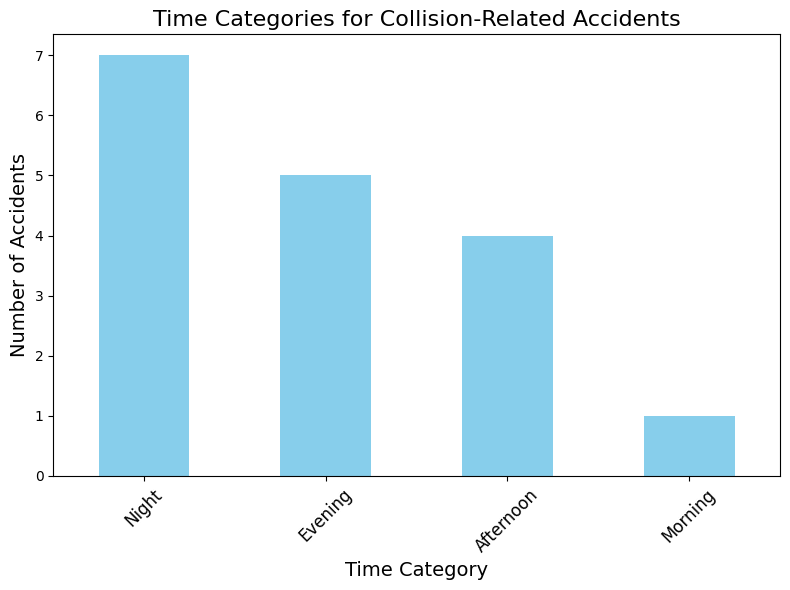

In [73]:
collision_keywords = ['collision', 'head-on', 'collided', 'collide', 'oncoming', 'rammed']

# Filter rows containing collision-related keywords in the 'Brief Accident Details/Cause' column
collision_rows = df[df['Brief Accident Details/Cause']
                    .str.contains('|'.join(collision_keywords), case=False, na=False)]


# Analyze the distribution of 'Time Category' for collision-related accidents
collision_time_distribution = collision_rows['Time Category'].value_counts()

# Display the most common time categories for collisions
print("Most common time categories for collisions:")
print(collision_time_distribution)

# Visualize the distribution

plt.figure(figsize=(8, 6))
collision_time_distribution.plot(kind='bar', color='skyblue')
plt.title('Time Categories for Collision-Related Accidents', fontsize=16)
plt.xlabel('Time Category', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


In [74]:
collision_rows

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Time Category
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4.0,4.30 pm,Afternoon
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1.0,5.50 pm,Evening
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4.0,NaN,None
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3.0,6.00 pm,Evening
7,2022-07-28,Makuyu,Makuyu,Murang'a,Kenol-Sagana Road,Vehicle rammed into a lorry,passengers,7.0,NaN,None
11,2020-09-27,Pangani,Pangani,Nairobi,Thika Road,Driver lost control and rammed into pillar,passengers and pedestrians,4.0,12.30 pm,Afternoon
12,2021-02-23,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Head on Collision,passengers,3.0,2.00 am,Night
13,2023-08-20,Naivasha,Marula Farm,Naivasha,Nairobi - Nakuru highway,Personal vehicle rammed onto an oncoming bus,drivers and passengers,2.0,2.00 am,Night
15,2023-09-08,Mlima Kiu,Salama,Makueni,Mombasa - Nairobi highway,Matatu collided head on with an oncoming truck,passengers,4.0,NaN,None
16,2023-04-18,Naivasha,Delamere Farm,Naivasha,Nairobi - Nakuru highway,Head on collision Matatu and lorry,passengers,6.0,NaN,None


In [75]:
collision_null_time = df[
    df['Time Category'].isnull() & 
    df['Brief Accident Details/Cause'].str.contains('|'.join(collision_keywords), case=False, na=False)
]

# Display the filtered rows
collision_null_time

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Time Category
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4.0,NaN,None
7,2022-07-28,Makuyu,Makuyu,Murang'a,Kenol-Sagana Road,Vehicle rammed into a lorry,passengers,7.0,NaN,None
15,2023-09-08,Mlima Kiu,Salama,Makueni,Mombasa - Nairobi highway,Matatu collided head on with an oncoming truck,passengers,4.0,NaN,None
16,2023-04-18,Naivasha,Delamere Farm,Naivasha,Nairobi - Nakuru highway,Head on collision Matatu and lorry,passengers,6.0,NaN,None
19,2022-09-21,Sachangwan,Sachangwan,Bomet,Bomet - Sotik highway,Matatu collided with a tractor,driver and passengers,4.0,NaN,None
24,2023-08-29,Ojolla,Ojolla,Kisumu,Kisumu - Busia Road,Head on collision,drivers and passengers,3.0,NaN,None
25,2021-08-25,Greensteads,Greensteads,Nakuru,Nakuru - Nairobi highway,Head on collision,passengers,3.0,NaN,None
29,2022-09-01,Taru,Taru township,Kwale,Mombasa - Nairobi highway,shuttle rammed into a lorry,driver and passengers,20.0,NaN,None
33,2023-06-24,Kaburengu Junction,Chimoi,Kakamega,Eldoret Webuye Highway,Bus and lorry collision,passengers,6.0,NaN,None
38,2023-09-26,Ainabkoi Intersection,Ainabkoi,Uansin Gishi,Nakuru Eldoret Highway,Bus collided with a saloon car,passengers,0.0,NaN,None


In [76]:
# Fill missing values in 'Time Category' for collision-related rows with 'Night'
df.loc[
    df['Time Category'].isnull() & 
    df['Brief Accident Details/Cause'].str.contains('|'.join(collision_keywords), case=False, na=False),
    'Time Category'
] = 'Night'

In [77]:
df.isnull().sum()

Date                             0
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    0
Brief Accident Details/Cause     0
Victims                          0
Total people confirmed dead      0
Time of the Accidents           54
Time Category                   27
dtype: int64

In [78]:
df[df['Brief Accident Details/Cause'].str.contains('lost|control|roll', case=False, na=False)]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Time Category
6,2022-07-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Driver lost control and swerved off the bridge,passengers,6.0,NaN,None
8,2022-06-28,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,passengers,4.0,NaN,None
9,2021-09-21,River Tungu,River Tungu,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,passengers,5.0,NaN,None
10,2021-09-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,passengers,4.0,NaN,None
11,2020-09-27,Pangani,Pangani,Nairobi,Thika Road,Driver lost control and rammed into pillar,passengers and pedestrians,4.0,12.30 pm,Afternoon
14,2020-08-17,River Maara,River Maara,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,passengers,3.0,NaN,None
22,2022-06-15,Koru,Muhoroni,Kisumu,Kisumu Highway,Bus lost control and rolled,driver and passengers,3.0,NaN,None
23,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,passengers,3.0,NaN,None
27,2023-01-13,Ratili,Ratili Narok south,Narok,Narok road,Saloom car rolled,driver and passengers,3.0,NaN,None
28,2023-05-22,Isinya,Isinya,Kajiado,Isinya Kiserian Road,Bus lost control and rolled into a ditch,passengers,7.0,NaN,None


/tmp/ipykernel_14501/3091338702.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_time_of_accidents.index, y=df_time_of_accidents.values, palette='Blues_d')


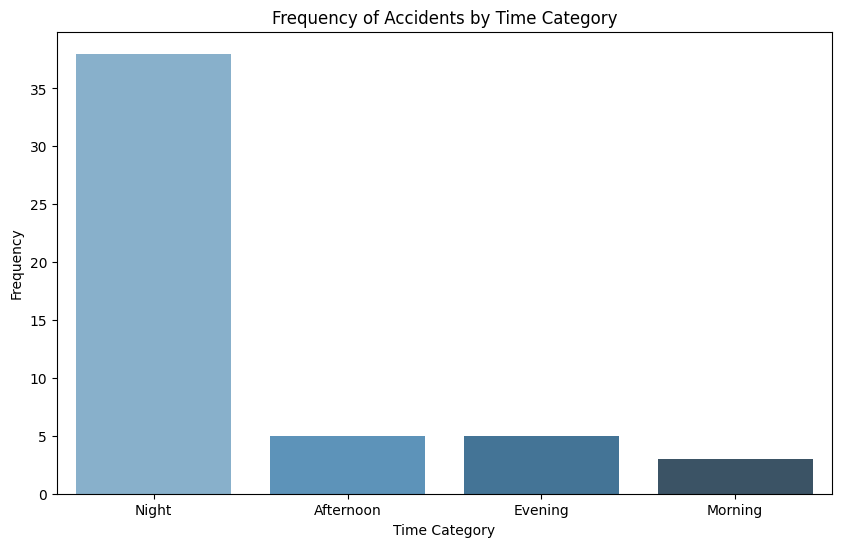

In [79]:
df_time_of_accidents = df['Time Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=df_time_of_accidents.index, y=df_time_of_accidents.values, palette='Blues_d')
plt.xlabel('Time Category')
plt.ylabel('Frequency')
plt.title('Frequency of Accidents by Time Category')
plt.show()

In [80]:
df =df.drop('Time Category', axis=1)
df

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4.0,4.30 pm
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1.0,5.50 pm
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4.0,NaN
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3.0,6.00 pm
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1.0,NaN
...,...,...,...,...,...,...,...,...,...
76,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,Bus lost control and rolled over,passengers,1.0,NaN
77,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,Car rammed into a trailer,passengers,1.0,11.00 pm
78,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,Truck driver collided with an oncoming matatu,passengers,1.0,NaN
79,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,Car rammed into a lorry,passengers,4.0,NaN


In [81]:
#function to get time category
def time_categorizer(time_str):
    if pd.isnull(time_str):
        return
    try:
        time = pd.to_datetime(time_str, format='%I.%M %p').time()
        if time < pd.to_datetime('04:00 AM').time() or time >= pd.to_datetime('09:00 PM').time():
            return 'Night'
        elif time < pd.to_datetime('12:00 PM').time():
            return 'Morning'
        elif time < pd.to_datetime('05:00 PM').time():
            return 'Afternoon'
        else:
            return 'Evening'
    except:
        return

df['Time Category'] = df['Time of the Accidents'].apply(time_categorizer)

df.head(20)


,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Time Category
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4.0,4.30 pm,Afternoon
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1.0,5.50 pm,Evening
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4.0,NaN,None
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3.0,6.00 pm,Evening
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1.0,NaN,None
5,2022-08-06,Mlima Swara,Mlima Swara,Murang'a,Kenol-Sagana Road,Car hit a stationary lorry,passengers,5.0,NaN,None
6,2022-07-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Driver lost control and swerved off the bridge,passengers,6.0,NaN,None
7,2022-07-28,Makuyu,Makuyu,Murang'a,Kenol-Sagana Road,Vehicle rammed into a lorry,passengers,7.0,NaN,None
8,2022-06-28,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,passengers,4.0,NaN,None
9,2021-09-21,River Tungu,River Tungu,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,passengers,5.0,NaN,None


In [82]:
highway_df = df[df['Road/ Highway'].str.contains('highway', case=False, na=False)]
len(highway_df)

42

In [83]:
#check road/highway column for keyword highway
# len of null val in highway_df
# len(highway_df[highway_df['Road/ Highway'] == None])
#get none values in Time Category and len
highway_df[highway_df['Time Category'].isnull()]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Time Category
15,2023-09-08,Mlima Kiu,Salama,Makueni,Mombasa - Nairobi highway,Matatu collided head on with an oncoming truck,passengers,4.0,NaN,None
16,2023-04-18,Naivasha,Delamere Farm,Naivasha,Nairobi - Nakuru highway,Head on collision Matatu and lorry,passengers,6.0,NaN,None
19,2022-09-21,Sachangwan,Sachangwan,Bomet,Bomet - Sotik highway,Matatu collided with a tractor,driver and passengers,4.0,NaN,None
21,2023-09-27,Sotik,Sotik,Bomet,Bomet - Sotik highway,Bodaboda rider hit by matatu,rider,3.0,NaN,None
22,2022-06-15,Koru,Muhoroni,Kisumu,Kisumu Highway,Bus lost control and rolled,driver and passengers,3.0,NaN,None
23,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,passengers,3.0,NaN,None
25,2021-08-25,Greensteads,Greensteads,Nakuru,Nakuru - Nairobi highway,Head on collision,passengers,3.0,NaN,None
29,2022-09-01,Taru,Taru township,Kwale,Mombasa - Nairobi highway,shuttle rammed into a lorry,driver and passengers,20.0,NaN,None
33,2023-06-24,Kaburengu Junction,Chimoi,Kakamega,Eldoret Webuye Highway,Bus and lorry collision,passengers,6.0,NaN,None
35,2023-06-24,Migaa,Mau Hills,Nakuru,Nakuru Eldoret Highway,Matatu driver lot ontrol and hit a lorry,driver and passengers,3.0,NaN,None


In [84]:
len(highway_df[highway_df['Time Category'].isnull()])

28

In [85]:
road_df = df[df['Road/ Highway'].str.contains('road', case=False, na=False)]
#check len of values containing road
len(df[df['Road/ Highway'].str.contains('road', case=False, na=False)])

35

In [86]:
road_df[road_df['Time Category'].isnull()]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Time Category
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4.0,NaN,None
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1.0,NaN,None
5,2022-08-06,Mlima Swara,Mlima Swara,Murang'a,Kenol-Sagana Road,Car hit a stationary lorry,passengers,5.0,NaN,None
6,2022-07-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Driver lost control and swerved off the bridge,passengers,6.0,NaN,None
7,2022-07-28,Makuyu,Makuyu,Murang'a,Kenol-Sagana Road,Vehicle rammed into a lorry,passengers,7.0,NaN,None
8,2022-06-28,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,passengers,4.0,NaN,None
9,2021-09-21,River Tungu,River Tungu,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,passengers,5.0,NaN,None
10,2021-09-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,passengers,4.0,NaN,None
14,2020-08-17,River Maara,River Maara,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,passengers,3.0,NaN,None
24,2023-08-29,Ojolla,Ojolla,Kisumu,Kisumu - Busia Road,Head on collision,drivers and passengers,3.0,NaN,None


In [87]:
len(road_df[road_df['Time Category'].isnull()])

25

In [88]:
#check road/highway column for word not containing road or highway
df[~df['Road/ Highway'].str.contains('road|highway', case=False, na=False)]

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time of the Accidents,Time Category
31,2022-07-05,Mlolongo,Mlolongo Exit,Nairobi,Nairobi Express way,Motorist crashed into toll station,driver and other motorists,1.0,NaN,None


In [89]:
# Group by County and count the number of null values in Time Category
null_time_by_county = df[df['Time Category'].isnull()].groupby('County').size().sort_values(ascending=False)

# Display the counties with the most null values
null_time_by_county


County
Nakuru           11
Kisumu            5
Tharaka Nithi     5
Narok             5
Murang'a          3
Bomet             2
Makueni           2
Muranga           2
Kiambu            2
Kirinyaga         2
Kajiado           2
Kitui             2
Kwale             2
Isiolo            1
Kakamega          1
Kisii             1
Migori            1
Naivasha          1
Nairobi           1
Taita Taveta      1
Uansin Gishi      1
Vihiga            1
dtype: int64

In [90]:
df['Time Category'] = df['Time Category'].ffill()

df[['Time Category']].head(30)


,Time Category
0,Afternoon
1,Evening
2,Evening
3,Evening
4,Evening
5,Evening
6,Evening
7,Evening
8,Evening
9,Evening


/tmp/ipykernel_14501/3091338702.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_time_of_accidents.index, y=df_time_of_accidents.values, palette='Blues_d')


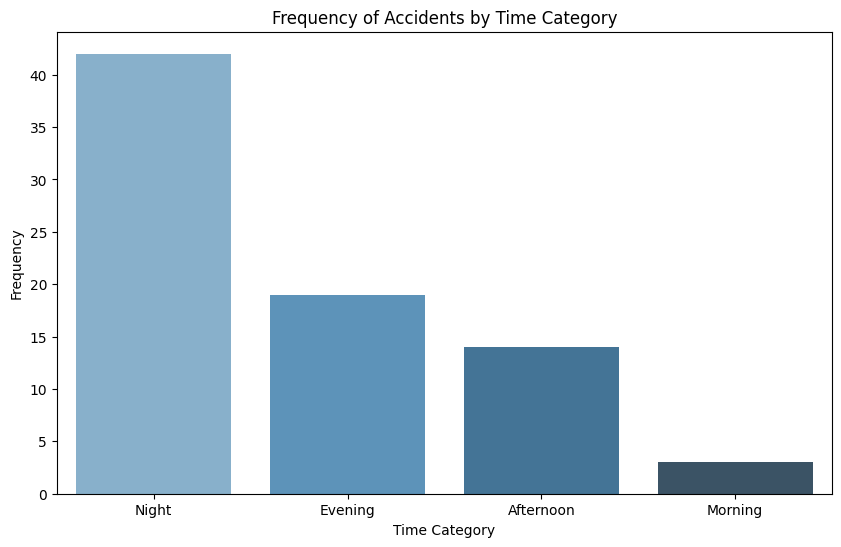

In [91]:
df_time_of_accidents = df['Time Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=df_time_of_accidents.index, y=df_time_of_accidents.values, palette='Blues_d')
plt.xlabel('Time Category')
plt.ylabel('Frequency')
plt.title('Frequency of Accidents by Time Category')
plt.show()

In [92]:
df.isnull().sum()

Date                             0
Accident Spot                    0
Area                             0
County                           0
Road/ Highway                    0
Brief Accident Details/Cause     0
Victims                          0
Total people confirmed dead      0
Time of the Accidents           54
Time Category                    0
dtype: int64

In [93]:
df.drop('Time of the Accidents', axis=1, inplace=True)
df.isnull().sum()

Date                            0
Accident Spot                   0
Area                            0
County                          0
Road/ Highway                   0
Brief Accident Details/Cause    0
Victims                         0
Total people confirmed dead     0
Time Category                   0
dtype: int64

In [94]:
df

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead,Time Category
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4.0,Afternoon
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1.0,Evening
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4.0,Evening
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3.0,Evening
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1.0,Evening
...,...,...,...,...,...,...,...,...,...
76,2022-06-03,Losengeli,Sabatia,Vihiga,Nairobi Kakamega road,Bus lost control and rolled over,passengers,1.0,Night
77,2022-05-31,Isinya,Isinya,Kajiado,Namanga Road,Car rammed into a trailer,passengers,1.0,Night
78,2022-05-30,Kinugi,Kinugi,Nakuru,Naivasha Nairobi Highway,Truck driver collided with an oncoming matatu,passengers,1.0,Night
79,2022-02-28,Kinugi,Kinugi,Nakuru,Nakuru - Nairobi highway,Car rammed into a lorry,passengers,4.0,Night


In [95]:
df.drop('Time Category', axis=1, inplace=True)

#### additional cleaning

In [96]:
#having toatl ppl confirmed dead as int
df['Total people confirmed dead'] = pd.to_numeric(df['Total people confirmed dead'], errors='coerce').fillna(0).astype(int)
df['Total people confirmed dead']

0     4
1     1
2     4
3     3
4     1
     ..
76    1
77    1
78    1
79    4
80    2
Name: Total people confirmed dead, Length: 78, dtype: int64

In [97]:
df.head(1)

,Date,Accident Spot,Area,County,Road/ Highway,Brief Accident Details/Cause,Victims,Total people confirmed dead
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4


In [98]:
#rename colss
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('-', '_')
df.head(1)

,date,accident_spot,area,county,road__highway,brief_accident_details_cause,victims,total_people_confirmed_dead
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4


In [99]:
df.rename(columns={
    'road__highway': 'road_highway',
    'brief_accident_details_cause': 'accident_cause',
    'total_people_confirmed_dead': 'total_dead'
}, inplace=True)
df.columns

Index(['date', 'accident_spot', 'area', 'county', 'road_highway',
       'accident_cause', 'victims', 'total_dead'],
      dtype='object')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 0 to 80
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            78 non-null     datetime64[ns]
 1   accident_spot   78 non-null     object        
 2   area            78 non-null     object        
 3   county          78 non-null     object        
 4   road_highway    78 non-null     object        
 5   accident_cause  78 non-null     object        
 6   victims         78 non-null     object        
 7   total_dead      78 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 5.5+ KB


## Risk Assessment

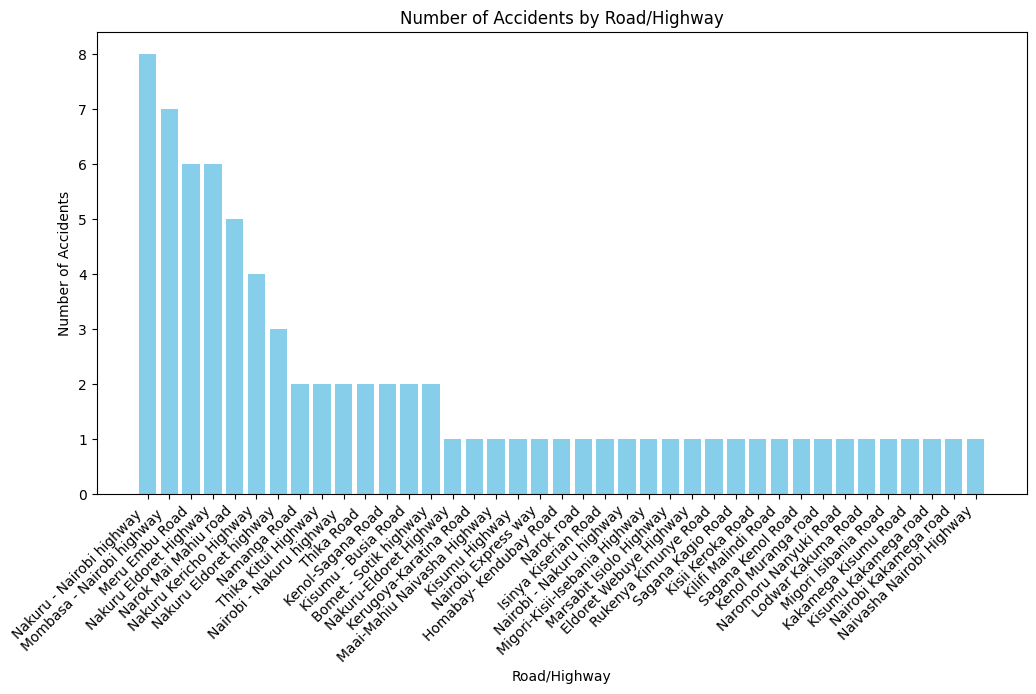

In [101]:
#visualization of road/highway with most accidents
plt.figure(figsize=(12, 6))
# sns.countplot(y='road_highway', data=df, order=df['road_highway'].value_counts().index, palette='Blues_d')
plt.bar(df['road_highway'].value_counts().index, df['road_highway'].value_counts().values, color='skyblue')
plt.ylabel('Number of Accidents')
plt.xlabel('Road/Highway')
plt.title('Number of Accidents by Road/Highway')
plt.xticks(rotation=45, ha='right')
plt.show()

In [102]:
collision_df = df[df['accident_cause'].str.contains('|'.join(collision_keywords), case=False, na=False)]
collision_df

,date,accident_spot,area,county,road_highway,accident_cause,victims,total_dead
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3
7,2022-07-28,Makuyu,Makuyu,Murang'a,Kenol-Sagana Road,Vehicle rammed into a lorry,passengers,7
11,2020-09-27,Pangani,Pangani,Nairobi,Thika Road,Driver lost control and rammed into pillar,passengers and pedestrians,4
12,2021-02-23,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Head on Collision,passengers,3
13,2023-08-20,Naivasha,Marula Farm,Naivasha,Nairobi - Nakuru highway,Personal vehicle rammed onto an oncoming bus,drivers and passengers,2
15,2023-09-08,Mlima Kiu,Salama,Makueni,Mombasa - Nairobi highway,Matatu collided head on with an oncoming truck,passengers,4
16,2023-04-18,Naivasha,Delamere Farm,Naivasha,Nairobi - Nakuru highway,Head on collision Matatu and lorry,passengers,6


In [103]:
len(collision_df)

44

In [104]:
#no of deaths in collision_df
collision_df['total_dead'].sum()

np.int64(262)

In [105]:
df['total_dead'].sum()

np.int64(375)

In [106]:
#fraction of deaths in collision_df
collision_df['total_dead'].sum() / df['total_dead'].sum()

np.float64(0.6986666666666667)

In [107]:
#deaths caused by lost control
lost_control_df = df[df['accident_cause'].str.contains('lost|control|roll|lot', case=False, na=False)]
lost_control_df

,date,accident_spot,area,county,road_highway,accident_cause,victims,total_dead
6,2022-07-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Driver lost control and swerved off the bridge,passengers,6
8,2022-06-28,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,passengers,4
9,2021-09-21,River Tungu,River Tungu,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,passengers,5
10,2021-09-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,passengers,4
11,2020-09-27,Pangani,Pangani,Nairobi,Thika Road,Driver lost control and rammed into pillar,passengers and pedestrians,4
14,2020-08-17,River Maara,River Maara,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,passengers,3
22,2022-06-15,Koru,Muhoroni,Kisumu,Kisumu Highway,Bus lost control and rolled,driver and passengers,3
23,2021-08-29,Londiani,Londiani,Nakuru,Nakuru Kericho Highway,Vehicle lost control nd rolled,passengers,3
27,2023-01-13,Ratili,Ratili Narok south,Narok,Narok road,Saloom car rolled,driver and passengers,3
28,2023-05-22,Isinya,Isinya,Kajiado,Isinya Kiserian Road,Bus lost control and rolled into a ditch,passengers,7


In [108]:
#fraction of deaths caused by lost control
lost_control_df['total_dead'].sum() / df['total_dead'].sum()

np.float64(0.23466666666666666)

In [109]:
tmp_df = df[~df['accident_cause'].str.contains('lost|control|roll|collision|head-on|collided|collide|oncoming|rammed', case=False, na=False)]
tmp_df

,date,accident_spot,area,county,road_highway,accident_cause,victims,total_dead
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1
5,2022-08-06,Mlima Swara,Mlima Swara,Murang'a,Kenol-Sagana Road,Car hit a stationary lorry,passengers,5
21,2023-09-27,Sotik,Sotik,Bomet,Bomet - Sotik highway,Bodaboda rider hit by matatu,rider,3
30,2023-05-15,Sachangwan,Sachangwan,Bomet,Nakuru Eldoret Highway,"Matatu hit a bump, veered off the road and lan...",passengers,5
31,2022-07-05,Mlolongo,Mlolongo Exit,Nairobi,Nairobi Express way,Motorist crashed into toll station,driver and other motorists,1
35,2023-06-24,Migaa,Mau Hills,Nakuru,Nakuru Eldoret Highway,Matatu driver lot ontrol and hit a lorry,driver and passengers,3
37,2023-09-27,Laisamis,Laisamis,Isiolo,Marsabit Isiolo Highway,Vehicle veered off rhe road after tyre burst,passengers,2
40,2023-08-28,Zion Area,Zion,Makueni,Mombasa - Nairobi highway,Bus hit a motorbike,rider,1
46,2023-09-08,Malili,Malili,Makueni,Mombasa - Nairobi highway,"Involved a truck, lorry and saloon car",passengers,0
48,2023-08-30,Nairagie-Enkare,Narok,Narok,Narok Mai Mahiu road,Bus burst into flames,passengers,0


/tmp/ipykernel_14501/833339225.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_victims_dead.index, y=df_victims_dead.values, palette='Blues_d')


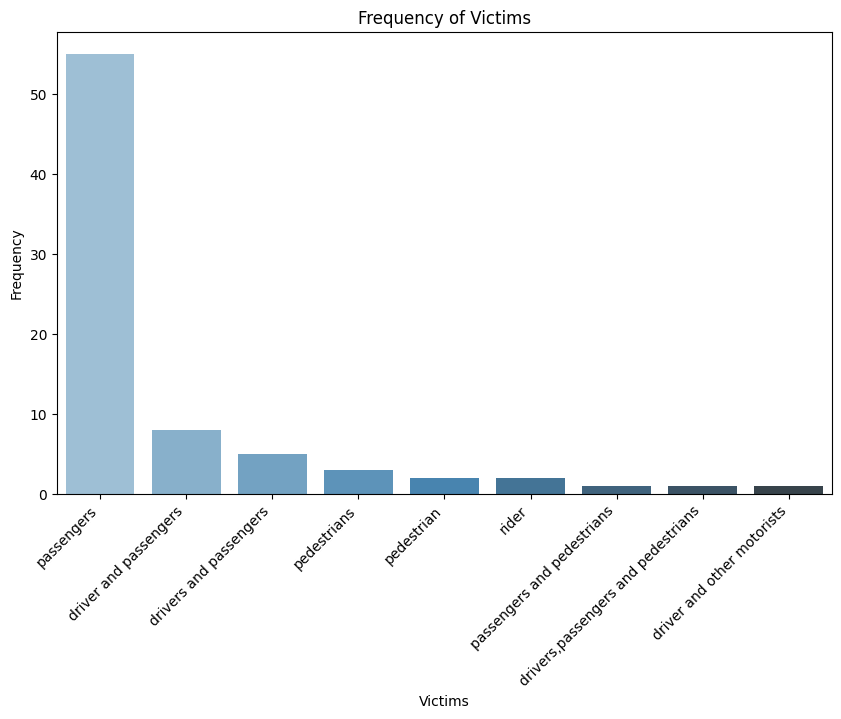

In [110]:
#victim categories visualization
df_victims_dead = df['victims'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=df_victims_dead.index, y=df_victims_dead.values, palette='Blues_d')
plt.xlabel('Victims')
plt.ylabel('Frequency')
plt.title('Frequency of Victims')
plt.xticks(rotation=45, ha='right')
plt.show()

In [111]:
df.head(1)

,date,accident_spot,area,county,road_highway,accident_cause,victims,total_dead
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4


In [112]:
df[df['total_dead'] == 0]

,date,accident_spot,area,county,road_highway,accident_cause,victims,total_dead
38,2023-09-26,Ainabkoi Intersection,Ainabkoi,Uansin Gishi,Nakuru Eldoret Highway,Bus collided with a saloon car,passengers,0
45,2023-09-18,Gitaru,Gitaru,Kiambu,Nakuru - Nairobi highway,Driver lost control and hit barrier,passengers,0
46,2023-09-08,Malili,Malili,Makueni,Mombasa - Nairobi highway,"Involved a truck, lorry and saloon car",passengers,0
48,2023-08-30,Nairagie-Enkare,Narok,Narok,Narok Mai Mahiu road,Bus burst into flames,passengers,0
52,2023-07-04,Mau Summit,Kuresoi North,Nakuru,Nakuru Kericho Highway,Bus lost control and landed in a ditch,passengers,0
53,2022-04-26,Kirinyaga,Kirinyaga,Kirinyaga,Rukenya Kimunye Road,Bus overturned,passengers,0
56,2021-12-03,Tuthamba,Kirinyaga,Kirinyaga,Sagana Kagio Road,Matatu collided head on with a saloon car,passengers,0
63,2023-03-31,Burguret Shopping centre,Burguret,Muranga,Naromoru Nanyuki Road,Bus overturned,passengers,0
66,2023-08-08,Ndarugo,Ndarugo,Kiambu,Thika Road,Truck lost control and overturned,passengers,0
68,2023-01-29,Mamboleo,Mamboleo,Kisumu,Kakamega Kisumu Road,Bus veered off the road and landed in a ditch,passengers,0


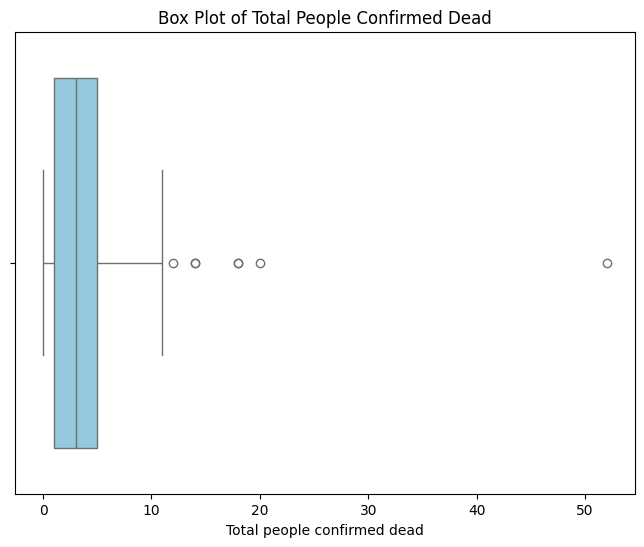

In [113]:
#boxplot for total dead
plt.figure(figsize=(8, 6))
sns.boxplot(x='total_dead', data=df, color='skyblue')
plt.title('Box Plot of Total People Confirmed Dead')
plt.xlabel('Total people confirmed dead')
plt.show()

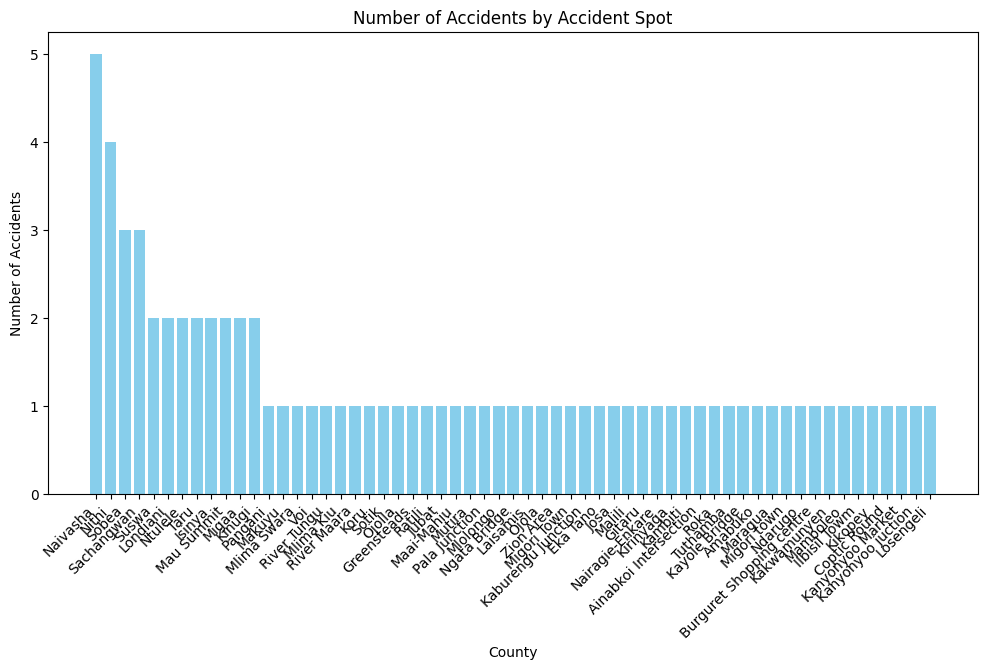

In [114]:
#visualize bar graph of most frequent accident spots
plt.figure(figsize=(12, 6))
plt.bar(df['accident_spot'].value_counts().index, df['accident_spot'].value_counts().values, color='skyblue')
plt.ylabel('Number of Accidents')
plt.xlabel('County')
plt.title('Number of Accidents by Accident Spot')
plt.xticks(rotation=45, ha='right')
plt.show()

In [115]:
len(df['accident_spot'].unique())

59

In [116]:
#add accident spot frq col
df['accident_spot_freq'] = df.groupby('accident_spot')['accident_spot'].transform('count')
df.head(5)

,date,accident_spot,area,county,road_highway,accident_cause,victims,total_dead,accident_spot_freq
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4,3
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1,1
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4,2
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3,2
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1,1


In [117]:
df[df['accident_spot'] == 'Ntulele']

,date,accident_spot,area,county,road_highway,accident_cause,victims,total_dead,accident_spot_freq
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4,2
50,2023-07-25,Ntulele,Narok,Narok,Narok Mai Mahiu road,truck collided head on with another truck,passengers,3,2


In [118]:
#add road/highway frq col
df['road_highway_freq'] = df.groupby('road_highway')['road_highway'].transform('count')
df.head(5)

,date,accident_spot,area,county,road_highway,accident_cause,victims,total_dead,accident_spot_freq,road_highway_freq
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4,3,1
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1,1,1
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4,2,5
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3,2,5
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1,1,1


In [119]:
collision_deaths = collision_df['total_dead'].sum() / df['total_dead'].sum()
lost_control_deaths = lost_control_df['total_dead'].sum() / df['total_dead'].sum()
print(f"Fraction of deaths caused by collisions: {collision_deaths:.2f}, Lost Control: {lost_control_deaths:.2f}")

Fraction of deaths caused by collisions: 0.70, Lost Control: 0.23


In [120]:
#add column containing deaths caused related to accident cause
#check if accident_cause contains collision or lost control if not set to 0.07
df['accident_cause_deaths'] = np.where(
    df['accident_cause'].str.contains('collision|head-on|collided|collide|oncoming|rammed', case=False, na=False), 
    0.7,  # Assign 0.7 for collisions and related keywords
    np.where(
        df['accident_cause'].str.contains('lost|control|roll|lot', case=False, na=False), 
        0.23,  # Assign 0.23 for lost control, rolling, etc.
        0.07  # Assign 0.07 for all other cases
    )
)
df.head(20)

,date,accident_spot,area,county,road_highway,accident_cause,victims,total_dead,accident_spot_freq,road_highway_freq,accident_cause_deaths
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4,3,1,0.70
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1,1,1,0.70
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4,2,5,0.70
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3,2,5,0.70
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1,1,1,0.07
5,2022-08-06,Mlima Swara,Mlima Swara,Murang'a,Kenol-Sagana Road,Car hit a stationary lorry,passengers,5,1,2,0.07
6,2022-07-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Driver lost control and swerved off the bridge,passengers,6,4,6,0.23
7,2022-07-28,Makuyu,Makuyu,Murang'a,Kenol-Sagana Road,Vehicle rammed into a lorry,passengers,7,1,2,0.70
8,2022-06-28,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the bridge,passengers,4,4,6,0.23
9,2021-09-21,River Tungu,River Tungu,Tharaka Nithi,Meru Embu Road,Vehicle rolled into the river,passengers,5,1,6,0.23


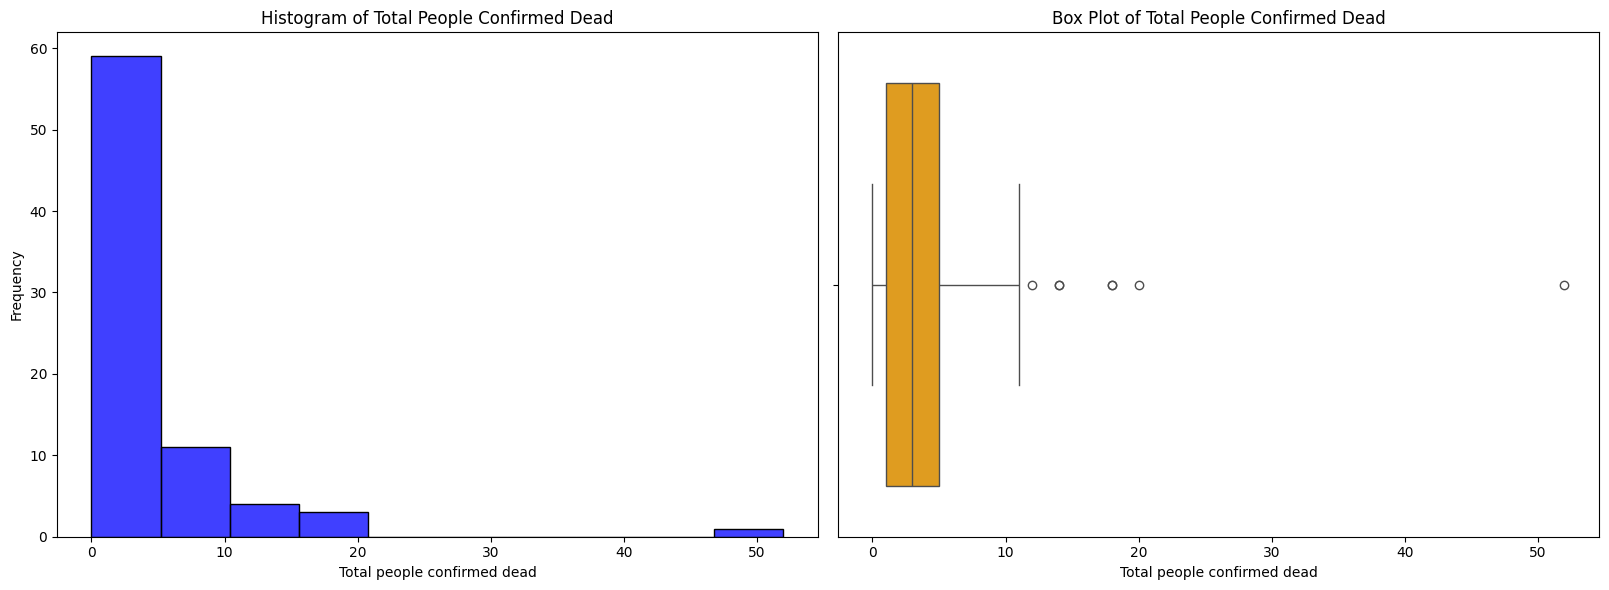

In [121]:
# Drop NaN values for visualization purposes
tot_dead_ppl = df['total_dead'].dropna()

# Create subplots for Histogram, Box Plot, and KDE Plot
plt.figure(figsize=(24, 6))

# 1. Histogram
plt.subplot(1, 3, 1)
sns.histplot(tot_dead_ppl, bins=10, kde=False, color='blue')
plt.title('Histogram of Total People Confirmed Dead')
plt.xlabel('Total people confirmed dead')
plt.ylabel('Frequency')

# 2. Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x=tot_dead_ppl, color='orange')
plt.title('Box Plot of Total People Confirmed Dead')
plt.xlabel('Total people confirmed dead')

plt.tight_layout()
plt.show()


In [122]:
#df of total_dead between 5 and 10


In [123]:
def calculate_weighted_risk_v2(row):
    # Initialize risk score components
    total_score = 0
    

    # Max values for normalization
    max_total_deaths = 5  # Set max value for total deaths normalization
    max_accident_cause_deaths = 0.7  # Max for accident cause deaths
    max_accident_spot_freq = 8  # Maximum observed for accident spot frequency
    max_road_highway_freq = 7  # Maximum observed for road highway frequency

    # 1. Total deaths (40% weight)
    if pd.notnull(row['total_dead']):
        normalized_deaths = row['total_dead'] / max_total_deaths
        total_score += 0.40 * min(normalized_deaths, 1)  # Cap it at 1

    # 2. Accident cause deaths (20% weight, cap at 0.7)
    #check if accident_cause contains collision keyword
    if pd.notnull(row['accident_cause']) and row['accident_cause_deaths'] == 0.7:
        total_score += 0.20
        # print(row['accident_cause'])
    
    
    # if pd.notnull(row['accident_cause_deaths']):
    #     normalized_cause_deaths = row['accident_cause_deaths'] / max_accident_cause_deaths
    #     total_score += 0.20 * min(normalized_cause_deaths, 1)

    # 3. Accident spot frequency (20% weight)
    if pd.notnull(row['accident_spot_freq']):
        normalized_spot_freq = row['accident_spot_freq'] / max_accident_spot_freq
        total_score += 0.30 * min(normalized_spot_freq, 1)

    # 4. Road highway frequency (20% weight)
    if pd.notnull(row['road_highway_freq']):
        normalized_road_freq = row['road_highway_freq'] / max_road_highway_freq
        total_score += 0.20 * min(normalized_road_freq, 1)
        
    # if total_score <= 0.30:
    #     return 'Low'
    # elif 0.30 < total_score <= 0.46:
    #     return 'Medium'
    # else:
    #     return 'High'
    if total_score <= 0.33:
        return 'Low'
    elif 0.33 < total_score <= 0.66:
        return 'Medium'
    else:
        return 'High'
# df.reset_index(drop=True, inplace=True)    

# Apply the function to each row to calculate the risk level
df['risk_level'] = df.apply(calculate_weighted_risk_v2, axis=1)


In [124]:
df[df['risk_level'] == 'High']

,date,accident_spot,area,county,road_highway,accident_cause,victims,total_dead,accident_spot_freq,road_highway_freq,accident_cause_deaths,risk_level
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4,3,1,0.70,High
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4,2,5,0.70,High
6,2022-07-27,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Driver lost control and swerved off the bridge,passengers,6,4,6,0.23,High
7,2022-07-28,Makuyu,Makuyu,Murang'a,Kenol-Sagana Road,Vehicle rammed into a lorry,passengers,7,1,2,0.70,High
12,2021-02-23,Nithi,Nithi Bridge,Tharaka Nithi,Meru Embu Road,Head on Collision,passengers,3,4,6,0.70,High
15,2023-09-08,Mlima Kiu,Salama,Makueni,Mombasa - Nairobi highway,Matatu collided head on with an oncoming truck,passengers,4,1,7,0.70,High
16,2023-04-18,Naivasha,Delamere Farm,Naivasha,Nairobi - Nakuru highway,Head on collision Matatu and lorry,passengers,6,5,1,0.70,High
17,2023-09-07,Voi,Ndii,Makueni,Mombasa - Nairobi highway,Matatu and Lorry head on collision,passengers,12,1,7,0.70,High
18,2023-06-30,Londiani,Londiani Junction,Nakuru,Nakuru Kericho Highway,Lorry failed brakes and rammed into four matat...,"drivers,passengers and pedestrians",52,2,4,0.70,High
19,2022-09-21,Sachangwan,Sachangwan,Bomet,Bomet - Sotik highway,Matatu collided with a tractor,driver and passengers,4,3,2,0.70,High


/tmp/ipykernel_14501/1862986183.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_levels.index, y=risk_levels.values, palette='Blues_d')


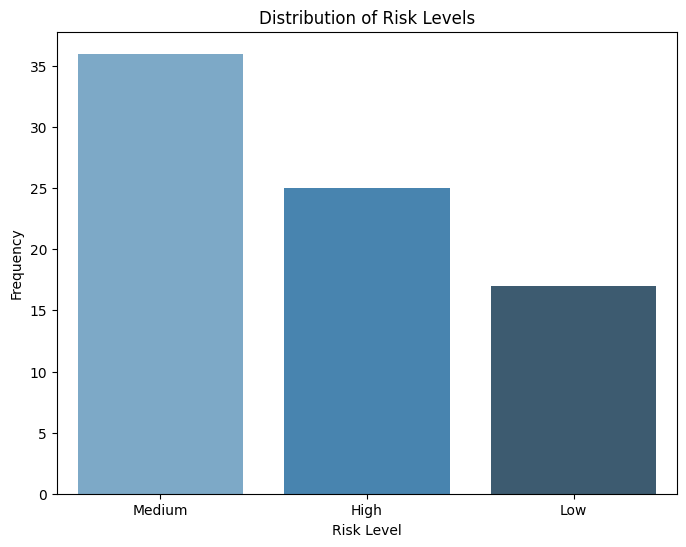

In [125]:
# Visualize the distribution of risk levels
risk_levels = df['risk_level'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=risk_levels.index, y=risk_levels.values, palette='Blues_d')
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Frequency')
plt.show()

In [127]:
df.to_excel('/home/keith/Documents/Code/KBSAss1/Data/TRAFFIC ACCIDENTS DATA CLEANED.xlsx', index=False)

### Building the model

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 0 to 80
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   78 non-null     datetime64[ns]
 1   accident_spot          78 non-null     object        
 2   area                   78 non-null     object        
 3   county                 78 non-null     object        
 4   road_highway           78 non-null     object        
 5   accident_cause         78 non-null     object        
 6   victims                78 non-null     object        
 7   total_dead             78 non-null     int64         
 8   accident_spot_freq     78 non-null     int64         
 9   road_highway_freq      78 non-null     int64         
 10  accident_cause_deaths  78 non-null     float64       
 11  risk_level             78 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 7.9

In [127]:
df.head(5)

,date,accident_spot,area,county,road_highway,accident_cause,victims,total_dead,accident_spot_freq,road_highway_freq,accident_cause_deaths,risk_level
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4,3,1,0.70,High
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1,1,1,0.70,Medium
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4,2,5,0.70,High
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3,2,5,0.70,Medium
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1,1,1,0.07,Low


#### Prepare the data

In [129]:
df_cp = df.copy()
df_cp.head(5)

,date,accident_spot,area,county,road_highway,accident_cause,victims,total_dead,accident_spot_freq,road_highway_freq,accident_cause_deaths,risk_level
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4,3,1,0.70,High
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1,1,1,0.70,Medium
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4,2,5,0.70,High
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3,2,5,0.70,Medium
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1,1,1,0.07,Low


In [130]:
# Create a new binary column: 1 if 'accident_cause_deaths' is high (i.e., collision), 0 otherwise
df_cp['is_collision'] = df_cp['accident_cause_deaths'].apply(lambda x: 1 if x == 0.70 else 0)

In [131]:
# Binning accident_cause_deaths into categorical values
def bin_accident_cause(val):
    if val == 0.7:
        return 'Collision'
    elif val == 0.23:
        return 'Lost Control'
    else:
        return 'Other'

# Apply the function to bin accident_cause_deaths
df_cp['accident_cause_category'] = df_cp['accident_cause_deaths'].apply(bin_accident_cause)

# One-hot encoding the new categorical feature
df_cp = pd.get_dummies(df_cp, columns=['accident_cause_category'], drop_first=True)
df_cp.head(5)

,date,accident_spot,area,county,road_highway,accident_cause,victims,total_dead,accident_spot_freq,road_highway_freq,accident_cause_deaths,risk_level,is_collision,accident_cause_category_Lost Control,accident_cause_category_Other
0,2023-08-08,Sobea,Sobea,Nakuru,Nakuru-Eldoret Highway,Head on Collision,passengers,4,3,1,0.70,High,1,False,False
1,2023-08-07,Maai-Mahiu,Naivasha,Nakuru,Maai-Mahiu Naivasha Highway,vehicle and motorcycle collision,passengers,1,1,1,0.70,Medium,1,False,False
2,2023-07-25,Ntulele,Ntulele,Narok,Narok Mai Mahiu road,Head on Collision,drivers and passengers,4,2,5,0.70,High,1,False,False
3,2022-12-02,Suswa,Suswa,Narok,Narok Mai Mahiu road,Head on Collision,driver and passengers,3,2,5,0.70,Medium,1,False,False
4,2022-12-01,Mutira,Mutira,Kirinyaga,Kerugoya-Karatina Road,Run over,pedestrian,1,1,1,0.07,Low,0,False,True


#### interaction features

In [132]:
# Interaction between accident_cause_deaths and total_dead
df_cp['interaction_total_dead_accident_cause'] = df_cp['total_dead'] * df_cp['accident_cause_deaths']

# Interaction between accident_cause_deaths and accident_spot_freq
df_cp['interaction_accident_spot_accident_cause'] = df_cp['accident_spot_freq'] * df_cp['accident_cause_deaths']

# Interaction between accident_cause_deaths and road_highway_freq
df_cp['interaction_road_highway_accident_cause'] = df_cp['road_highway_freq'] * df_cp['accident_cause_deaths']

In [133]:
from sklearn.model_selection import train_test_split
X = df_cp[[
   'total_dead', 
   'accident_spot_freq', 
   'road_highway_freq', 
   'accident_cause_deaths',
   'accident_cause_category_Lost Control',
   'accident_cause_category_Other', 
   'interaction_total_dead_accident_cause',
   'interaction_accident_spot_accident_cause',
   'interaction_road_highway_accident_cause'  
]]
y = df_cp['risk_level']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [134]:
X

,total_dead,accident_spot_freq,road_highway_freq,accident_cause_deaths,accident_cause_category_Lost Control,accident_cause_category_Other,interaction_total_dead_accident_cause,interaction_accident_spot_accident_cause,interaction_road_highway_accident_cause
0,4,3,1,0.70,False,False,2.80,2.10,0.70
1,1,1,1,0.70,False,False,0.70,0.70,0.70
2,4,2,5,0.70,False,False,2.80,1.40,3.50
3,3,2,5,0.70,False,False,2.10,1.40,3.50
4,1,1,1,0.07,False,True,0.07,0.07,0.07
...,...,...,...,...,...,...,...,...,...
76,1,1,1,0.23,True,False,0.23,0.23,0.23
77,1,2,2,0.70,False,False,0.70,1.40,1.40
78,1,2,1,0.70,False,False,0.70,1.40,0.70
79,4,2,8,0.70,False,False,2.80,1.40,5.60


In [135]:
y

0       High
1     Medium
2       High
3     Medium
4        Low
       ...  
76       Low
77    Medium
78    Medium
79      High
80    Medium
Name: risk_level, Length: 78, dtype: object

#### Train multiple models

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Initialize models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(
        random_state=42, 
        max_iter=1000, 
        # class_weight='balanced'
        ),
    'Decision Tree': DecisionTreeClassifier(
        random_state=42, 
        max_depth=5, 
        # criterion='entropy'
        ),
    'Random Forest': RandomForestClassifier(
        random_state=42, 
        n_estimators=100
        ),
    'SVM': SVC(
        probability=True, 
        random_state=42,
        class_weight='balanced'
        )
}
# Define hyperparameters for each model
param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean distance
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear'],
        'class_weight': [None, 'balanced']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'class_weight': [None, 'balanced']
    }
}

# Train and tune each model using GridSearchCV
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model from the grid search
    best_model = grid_search.best_estimator_
    
    # Evaluate on test set
    y_pred = best_model.predict(X_test)
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))


Tuning hyperparameters for KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Classification Report for KNN:
              precision    recall  f1-score   support

        High       1.00      0.71      0.83         7
         Low       1.00      1.00      1.00         7
      Medium       0.75      1.00      0.86         6

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.93      0.90      0.90        20

Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters for Logistic Regression: {'C': 10, 'class_weight': 'balanced', 'solver': 'liblinear'}
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        High       1.00      0.86      0.92         7
         Low       1.00      0.86      

<Figure size 800x600 with 0 Axes>

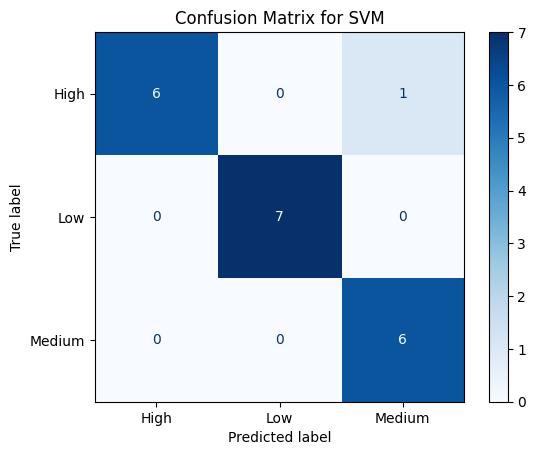

In [141]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#import confusion matrix
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Re-train the SVM with the best hyperparameters
svm_best = SVC(C=10, class_weight='balanced', kernel='rbf', probability=True, random_state=42)

# Fit the model
svm_best.fit(X_train, y_train)

# Predict probabilities (decision function or predict_proba)
y_score = svm_best.predict_proba(X_test)

# Assuming your labels are ['Low', 'Medium', 'High']
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM')
plt.show()


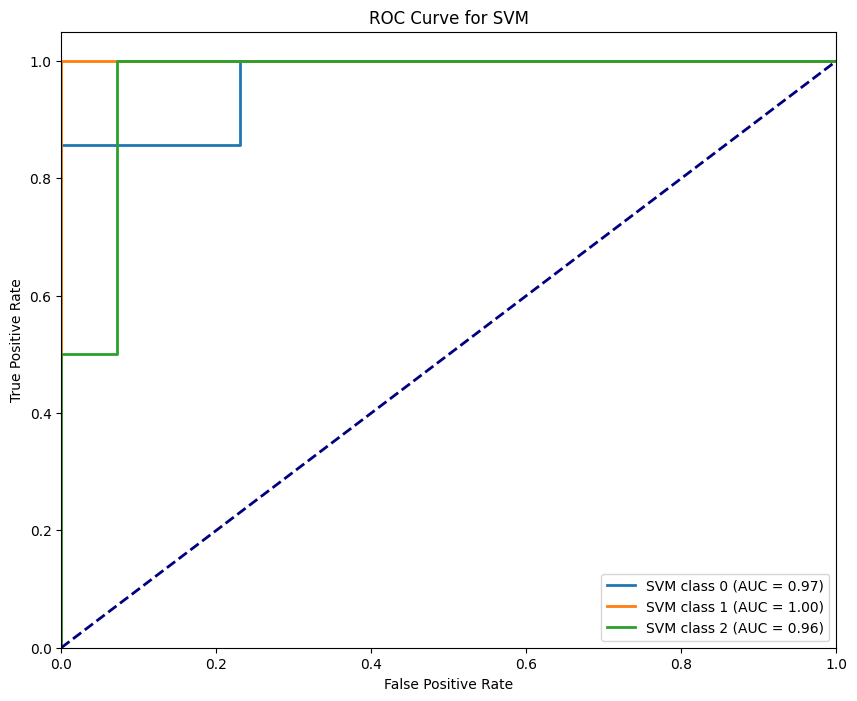

In [140]:
# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'SVM class {i} (AUC = {roc_auc:.2f})')

# Plot baseline
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.show()